In [1]:
from pandas_datareader import wb
from datetime import datetime
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import os
from  matplotlib.colors import LinearSegmentedColormap


#Dates parameters
start = datetime(1960, 1, 1)
end = datetime(2023, 12, 31)

## **¿How to visualize geographical data from the World Bank?**


<font size="3"> The World Bank has one of the most comprehensive database about economic and social variables for countries. In this notebook you can find an example on how to get this data and plot it in a map.<br><br>
    
<font size="3"> The World Bank has an API that you can use to download the data using only python code. The pandas_datareader library is very useful for that purpose Below you can find an example on how this works. The geopandas library allows you to plot geographical data easily.<br><br>

In [2]:
#Get all countries basic info
countries = wb.get_countries()

#Get all countries coordinates from geopandas
countries_coordinates = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [3]:
#Make dataframe of a variable - in this case GDP per capita

variable = 'NY.GDP.PCAP.CD'
description = 'GDP per capita (current US$)'

variable_countries_df = wb.download(indicator = variable, 
                               start=start,end=end,
                               country=['BR','CO','MX','CL','PE','AR','BO','EC','NI','PY','UY','VE','PA','CR','HN','SV','GT','SR','GY'] )

variable_countries_df.reset_index(inplace=True)

In [4]:
#Create a dataframe with the coordinates for each country to make georeference chart

df_TOTAL = pd.merge(variable_countries_df,countries[['name','iso3c']],left_on='country',right_on='name',how='left')
df_TOTAL = pd.merge(countries_coordinates[['iso_a3','geometry']],df_TOTAL,left_on='iso_a3',right_on='iso3c',how='left')
df_TOTAL.dropna(inplace=True)

In [5]:
#Create a list of figures to make a gif file
list_of_years = df_TOTAL['year'].unique()
filenames = []
vmin, vmax = 1000, 20000

for actual_year in list_of_years:
    output_path = ''
    year = actual_year
    fig = df_TOTAL[df_TOTAL['year']==year].plot(column=variable,figsize=(15,10),legend=True,cmap='coolwarm',vmin=vmin, vmax=vmax, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    fig.set_title(description, fontdict={'fontsize': '25','fontweight' : '3'})
    fig.axis('off')
    plt.text(-120,-60,'Source: World Bank Database')

    plt.box(on=None)
    plt.close()    
    
    filename = f'{actual_year}GDPperCapita.png'
    #Repeat 5 images per cicle to kake .gif look slower
    for i in range(5):
        filenames.append(filename)        

    filepath = os.path.join(output_path, filename)    

    # position the annotation in the center
    fig.annotate(year,xy=(0.6, 0.8), xycoords='figure fraction',horizontalalignment='left', verticalalignment='top',fontsize=35)
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)
    
filenames.sort()

In [6]:
# Build GIF -- takes some minutes
 
with imageio.get_writer('GDPperCapita.gif', mode='I',loop=1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
    # Remove files
    for filename in set(filenames):
        os.remove(filename)
        

#CREDITS        
#https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30
#https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8

C:\Users\andre\AppData\Local\Temp\ipykernel_11224\1229472376.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


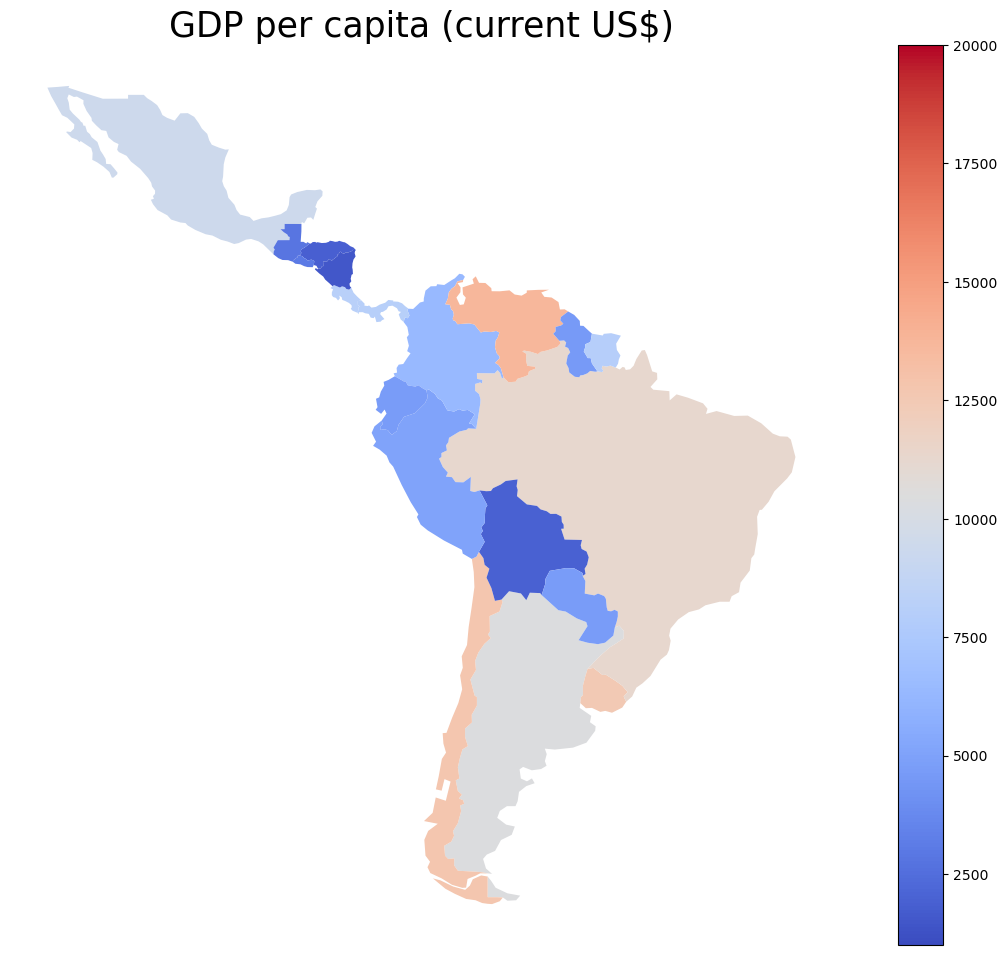

In [16]:
fig = df_TOTAL[df_TOTAL['year']=='2010'].plot(column=variable,figsize=(15,10),legend=True,cmap='coolwarm',vmin=vmin, vmax=vmax, norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.axis('off')
fig.set_title(description, fontdict={'fontsize': '25','fontweight' : '3'})
plt.subplots_adjust(bottom=0.1, right=1.0, top=1.0)

> *What we have to learn to do, we learn by doing*. *Aristotle*

<font size="3">
Follow me on <a href="https://co.linkedin.com/in/andres-gomez-hernandez" target="_blank">Linkedin</a> for topics about quantitative finance, data science and emerging markets.
</font>